Relax and Hold Steady!

Explore steady solutions

Poisson's equation:

$$\nabla^2 u = f$$

where unkown u and f are functions of space on domain $\Omega$. We require BCs, could be Dirichlet

$$u = b_1 on \partial \Omega$$

or Nuemann BC

$$\frac{\partial u }{\partial n} = b_2 \ on \ \partial \Omega$$

A boundary-value problem consists of finding u, given the above information. We can do this using relaxation method which start with initial guess for u and iterate towards solution.

Laplace's Equation

Particular case of f = 0 results in Laplace Equation:

$$\nabla^2 u = 0$$

two-dimensional steady heat conduction:

$$\frac{\partial^2 T}{\partial x^2} + \frac{\partial^2 T}{\partial y^2} = 0$$

 This study of Laplace's equation is called potential theory and solutions themselves are potential fields. We will use p from now on:
 
 $$\frac{\partial^2 p}{\partial x^2} + \frac{\partial^2 p}{\partial y^2} = 0$$
 
 Like in diffusion equation we discretize the second-order derivatives with central differences.
 
 $$\frac{p_{i+1,j} - 2p_{i,j} + p_{i-1,j}}{\Delta x^2} + \frac{p_{i,j+1} - 2p_{i,j} + p_{i,j-1}}{\Delta y^2}= 0$$
 
 When $\Delta x = \Delta y$:
 
$$ p_{i+1,j} + p_{i-1,j} p_{i,j+1} + p_{i,j-1} - 4p_{i,j} = 0$$

Jacobi method:

$$p_{i,j}^{k+1} = \frac{1}{4} \left( p_{i+1,j}^k + p_{i-1,j}^k + p_{i,j+1}^k + p_{i,j-1}^k \right) $$

Boundary Conditions and relaxation

We will model steady state heat transfer on a computer chip.

$$p = 0 \ at \ x=0$$
$$\frac{\partial p }{\partial x} = 0 \ at \ x = L$$
$$p = 0 \ at \ y = 0$$
$$p = sin\left( \frac{\frac{3}{2} \pi x}{L} \right) \ at \ y =H$$



In [1]:
from matplotlib import pyplot 
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] =16

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [12]:
def plot_3D(x, y, p):

    fig = pyplot.figure(figsize=(11,7), dpi=100)
    ax = fig.gca(projection='3d')
    X,Y = numpy.meshgrid(x,y)
    surf = ax.plot_surface(X,Y,p[:], rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=False)

    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')
    ax.view_init(30,45)

  

Analytical Solution

$$p(x,y) = \frac{sinh \left( \frac{\frac{3}{2} \pi y}{L} \right) }{sinh \left( \frac{\frac{3}{2} \pi H}{L} \right)} sin \left( \frac{\frac{3}{2} \pi x}{L} \right) $$

In [13]:
def p_analytical(x,y):
    X,Y = numpy.meshgrid(x,y)
    
    p_an = numpy.sinh(1.5*numpy.pi*Y / x[-1]) /\
    (numpy.sinh(1.5*numpy.pi*y[-1]/x[-1]))*numpy.sin(1.5*numpy.pi*X/x[-1])
    
    return p_an

In [14]:
nx = 41
ny = 41

x = numpy.linspace(0,1,nx)
y = numpy.linspace(0,1,ny)

p_an = p_analytical(x,y)

AttributeError: 'module' object has no attribute 'viridis'

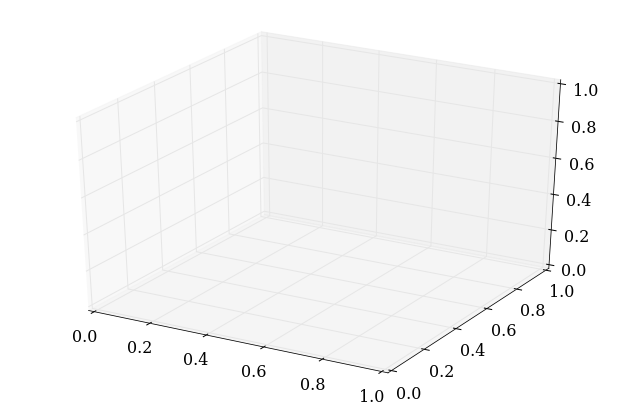

In [15]:
plot_3D(x,y,p_an)

\begin{equation}
|\textbf{x}| = \sqrt{\sum_{i=0, j=0}^k \left|p^{k+1}_{i,j} - p^k_{i,j}\right|^2}
\end{equation}



\begin{equation}
|\textbf{x}| = \frac{\sqrt{\sum_{i=0, j=0}^k \left|p^{k+1}_{i,j} - p^k_{i,j}\right|^2}}{\sqrt{\sum_{i=0, j=0}^k \left|p^k_{i,j}\right|^2}}
\end{equation}



In [16]:
def L2_error(p,pn):
    return numpy.sqrt(numpy.sum((p-pn)**2)/numpy.sum(pn**2))


In [20]:
def laplace2d(p, y, dx, dy, _12target):
    _12norm = 1
    pn = numpy.empty_like(p)
    iterations = 0
    while _12norm > _12target:
        pn = p.copy()
        p[1:-1,1:-1] = .25 * (pn[1:-1,2:] + pn[1:-1, :-2] \
                             +pn[2:, 1:-1] + pn[:-2,1:-1])
        
        p[1:-1, -1] = p[1:-1, -2]
        _12norm = L2_error(p,pn)
        
    return p

The initial values of the potential field are zero everywhere (initial guess), except at the boundary: 

$$p = \sin \left(  \frac{\frac{3}{2}\pi x}{L} \right) \text{ at } y=H$$

In [21]:
nx = 41
ny = 41
dx = 1/(nx-1)
dy = 1/(ny-1)

p = numpy.zeros((nx,ny))

x = numpy.linspace(0,1,nx)
y = numpy.linspace(0,1,ny)

p[-1,:] = numpy.sin(1.5*numpy.pi*x/x[-1])

AttributeError: 'module' object has no attribute 'viridis'

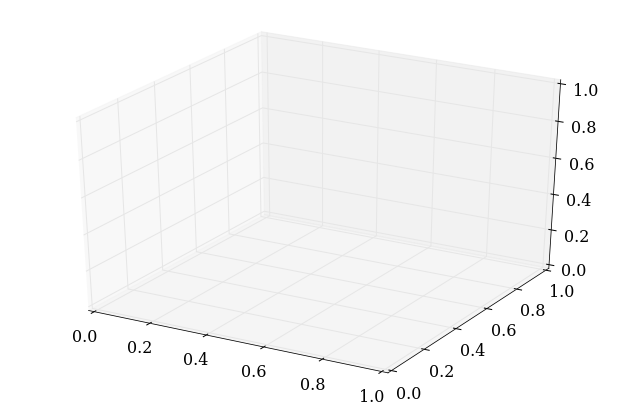

In [22]:
plot_3D(x,y,p)

In [23]:
p = laplace2d(p.copy(), y, dx, dy, 1e-8)

AttributeError: 'module' object has no attribute 'viridis'

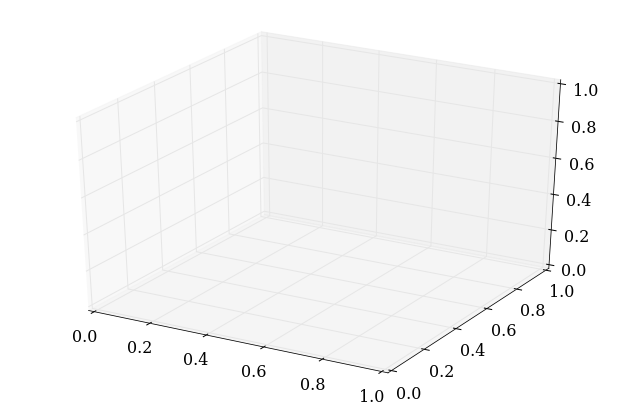

In [24]:
plot_3D(x,y,p)

In [25]:
def laplace_IG(nx):
    dx = 1/(nx-1)
    
    p = numpy.zeros((nx,nx))
    
    x = numpy.linspace(0,1,nx)
    y = x
    dy = dx
    
    p[:,0] = 0
    p[0,:] = 0
    p[-1,:] = numpy.sin(1.5*numpy.pi*x/x[-1])
    
    return p,x,y,dx,dy

In [26]:
nx_values = [11,21,41,81]
_12target = 1e-8

error = numpy.empty_like(nx_values, dtype=numpy.float)

for i, nx in enumerate(nx_values):
    p,x,y,dx,dy = laplace_IG(nx)
    
    p=laplace2d(p.copy(), y, dx, dy, _12target)
    
    p_an = p_analytical(x,y)
    
    error[i] = L2_error(p,p_an)

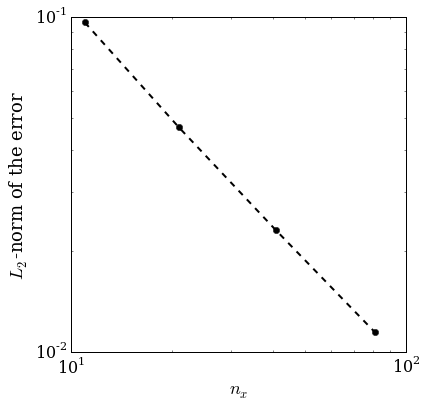

In [27]:
pyplot.figure(figsize=(6,6))
pyplot.grid(True)
pyplot.xlabel(r'$n_x$', fontsize=18)
pyplot.ylabel(r'$L_2$-norm of the error', fontsize=18)

pyplot.loglog(nx_values, error, color='k', ls='--', lw=2, marker='o')
pyplot.axis('equal');

In [28]:
def laplace2d_neumann(p,y,dx,dy,_12target):
    _12norm = 1
    pn = numpy.empty_like(p)
    iterations = 0
    while _12norm > _12target:
        pn = p.copy()
        p[1:-1,1:-1] = .25 * (pn[1:-1,2:] + pn[1:-1, :-2] \
                              + pn[2:, 1:-1] + pn[:-2, 1:-1])
        
        p[1:-1,-1] = .25 * (2*pn[1:-1,-2] + pn[2:, -1] + pn[:-2, -1])
        
        _12norm = L2_error(p,pn)
    return p

In [29]:
nx_values = [11,21,41,81]
_12target = 1e-8

error = numpy.empty_like(nx_values, dtype=numpy.float)

for i, nx in enumerate(nx_values):
    p,x,y,dx,dy = laplace_IG(nx)
    
    p=laplace2d_neumann(p.copy(), y, dx, dy, _12target)
    
    p_an = p_analytical(x,y)
    
    error[i] = L2_error(p,p_an)

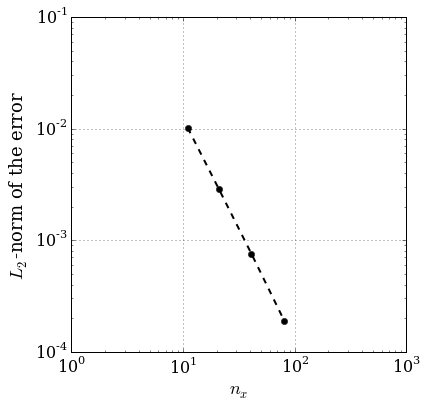

In [30]:
pyplot.figure(figsize=(6,6))
pyplot.grid(True)
pyplot.xlabel(r'$n_x$', fontsize=18)
pyplot.ylabel(r'$L_2$-norm of the error', fontsize=18)

pyplot.loglog(nx_values, error, color='k', ls='--', lw=2, marker='o')
pyplot.axis('equal');